In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LogNorm # norm=LogNorm(), 
import os

/home/valentin/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sns.set_theme()
sns.set(font="Ubuntu")

In [3]:
def to_categories(df):
    type_dict = dict.fromkeys(df.select_dtypes('object'), 'category')
    return df.astype(type_dict)

def to_object(df):
    type_dict = dict.fromkeys(df.select_dtypes('category'), 'object')
    return df.astype(type_dict)

In [4]:
athletes = pd.read_csv('data/athletes_full.csv')
athletes = to_object(athletes)

In [5]:
athletes_roles = pd.read_csv('data/athletes_roles.csv')
noc_countries = pd.read_csv('data/noc_countries.csv')
host_cities = pd.read_csv('data/games.csv')

In [6]:
noc_countries

,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra
...,...,...
228,WIF,West Indies Federation
229,YEM,Yemen
230,YUG,Yugoslavia
231,ZAM,Zambia


In [7]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476348 entries, 0 to 476347
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            476348 non-null  int64  
 1   name          476348 non-null  object 
 2   gender        476348 non-null  object 
 3   born          466954 non-null  object 
 4   died          115968 non-null  object 
 5   height        348837 non-null  float64
 6   weight        339742 non-null  float64
 7   team          476348 non-null  object 
 8   game          476348 non-null  object 
 9   noc           476348 non-null  object 
 10  sport         476348 non-null  object 
 11  event         476348 non-null  object 
 12  medal         66026 non-null   object 
 13  roles         476348 non-null  object 
 14  country       476348 non-null  object 
 15  host_city     476348 non-null  object 
 16  host_noc      476348 non-null  object 
 17  year          476348 non-null  int64  
 18  seas

In [8]:
athletes.head()

,id,name,gender,born,died,height,weight,team,game,noc,...,event,medal,roles,country,host_city,host_noc,year,season,competition,host_country
0,131892,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2016 Summer Olympics,TUR,...,"Athletics, Marathon, Women(Olympic)",NaN,Competed in Olympic Games,Türkiye,Rio de Janeiro,BRA,2016,Summer,Olympics,Brazil
1,131892,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2020 Summer Olympics,TUR,...,"Athletics, Marathon, Women(Olympic)",NaN,Competed in Olympic Games,Türkiye,Tokyo,JPN,2020,Summer,Olympics,Japan
2,131892,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2020 Summer Olympics,TUR,...,"Athletics, Marathon, Women(Olympic)",NaN,Competed in Olympic Games,Türkiye,Tokyo,JPN,2020,Summer,Olympics,Japan
3,4300,Maurice Maina,Male,1963-01-01,NaN,158.0,47.0,Kenya,1988 Summer Olympics,KEN,...,"Boxing, Light-Flyweight, Men(Olympic)",NaN,Competed in Olympic Games,Kenya,Seoul,KOR,1988,Summer,Olympics,Republic of Korea
4,4300,Maurice Maina,Male,1963-01-01,NaN,158.0,47.0,Kenya,1988 Summer Olympics,KEN,...,"Boxing, Light-Flyweight, Men(Olympic)",NaN,Competed in Olympic Games,Kenya,Seoul,KOR,1988,Summer,Olympics,Republic of Korea


In [9]:
sports = athletes['sport'].unique()
print(sports)

['Athletics' 'Boxing' 'Wrestling' 'Sailing' 'Speed Skating (Skating)'
 'Football (Football)' 'Baseball (Baseball/Softball)'
 'Short Track Speed Skating (Skating)' 'Hockey' 'Shooting'
 'Art Competitions' 'Ice Hockey (Ice Hockey)' 'Canoe Sprint (Canoeing)'
 'Swimming (Aquatics)' 'Cycling Track (Cycling)' 'Wushu'
 'Basketball (Basketball)' 'Golf' 'Weightlifting' 'Rowing' 'Biathlon'
 'Cycling Road (Cycling)' 'Softball (Baseball/Softball)' 'Judo'
 'Alpine Skiing (Skiing)' 'Cross Country Skiing (Skiing)' 'Curling'
 'Artistic Gymnastics (Gymnastics)' 'Equestrian Dressage (Equestrian)'
 'Water Polo (Aquatics)' 'Freestyle Skiing (Skiing)'
 'Snowboarding (Skiing)' 'Handball' 'Table Tennis'
 'Volleyball (Volleyball)' 'Fencing' 'Archery' 'Badminton' 'Taekwondo'
 'Basque pelota' 'Beach Volleyball (Volleyball)' 'Rugby Sevens (Rugby)'
 'Equestrian Jumping (Equestrian)' 'Tennis' 'Diving (Aquatics)'
 'Canoe Slalom (Canoeing)' 'Mixed Sports' 'Karate' 'Tug-Of-War'
 'Modern Pentathlon' 'Nordic Combined (S

## Number of medals in 2020

In [10]:
sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['game'] == '2020 Summer Olympics') & (athletes['medal'] == 'Gold')]
sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
sub_count = sub_athletes['country'].value_counts()
top_gold_medals = sub_count.reset_index(name='medal').head(15)

/tmp/ipykernel_3235/492621799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates


Text(0.5, 1.0, 'Gold medals per Country in 2020')

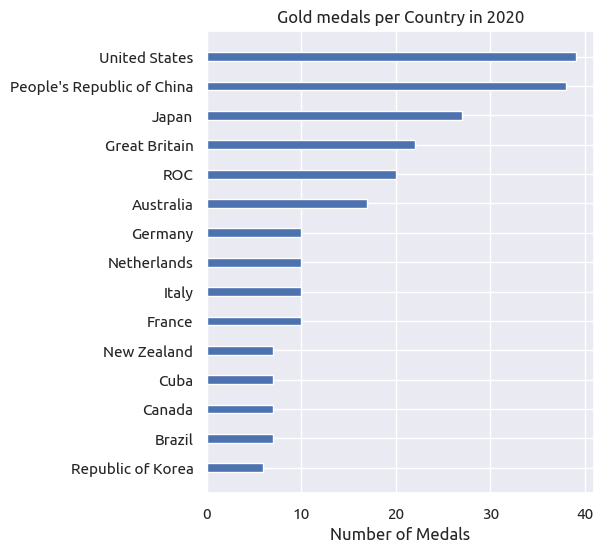

In [11]:
fig, ax = plt.subplots(figsize=(5,6))
plt.barh(y="country", width="medal", data=top_gold_medals, height=.3)
ax.invert_yaxis()
plt.xlabel("Number of Medals")
plt.title('Gold medals per Country in 2020')

In [12]:
sub_host_cities = host_cities[(host_cities['competition'] == 'Olympics') & (host_cities['season'] == 'Summer')]
sub_count = sub_host_cities['noc'].value_counts()
top_hoster = sub_count.reset_index(name='host_summer').set_index('noc')
sub_host_cities = host_cities[(host_cities['competition'] == 'Olympics') & (host_cities['season'] == 'Winter')]
sub_count = sub_host_cities['noc'].value_counts()
top_hoster['host_winter'] = sub_count
sub_count = host_cities['noc'].value_counts()
top_hoster['total'] = sub_count
top_hoster.sort_values(by=['total', 'host_summer', 'host_winter'], ascending=False, inplace=True)
top_hoster = top_hoster.head(10)

top_hoster = top_hoster.merge(noc_countries, on='noc', how='left') # we add the metadata using the noc identifier

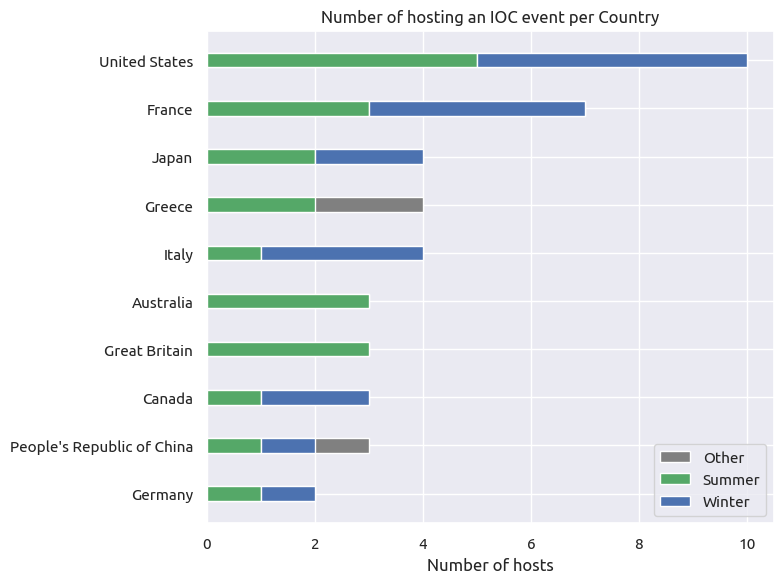

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.barh(y='country', width="total", data=top_hoster, height=.3, color='grey', label='Other')
plt.barh(y='country', width="host_summer", data=top_hoster, height=.3, color='g', label='Summer')
plt.barh(y='country', width="host_winter", left="host_summer", data=top_hoster, height=.3, color='b', label='Winter')
ax.invert_yaxis()
plt.xlabel("Number of hosts")
#plt.ylabel("Country")
plt.title('Number of hosting an IOC event per Country')
plt.legend()
plt.tight_layout()

## Athletes stats

In [14]:
sub_athletes = athletes[athletes['year'] > 2000]
sub_athletes_group = sub_athletes.groupby('sport')
sub_sports = sports[:10]

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


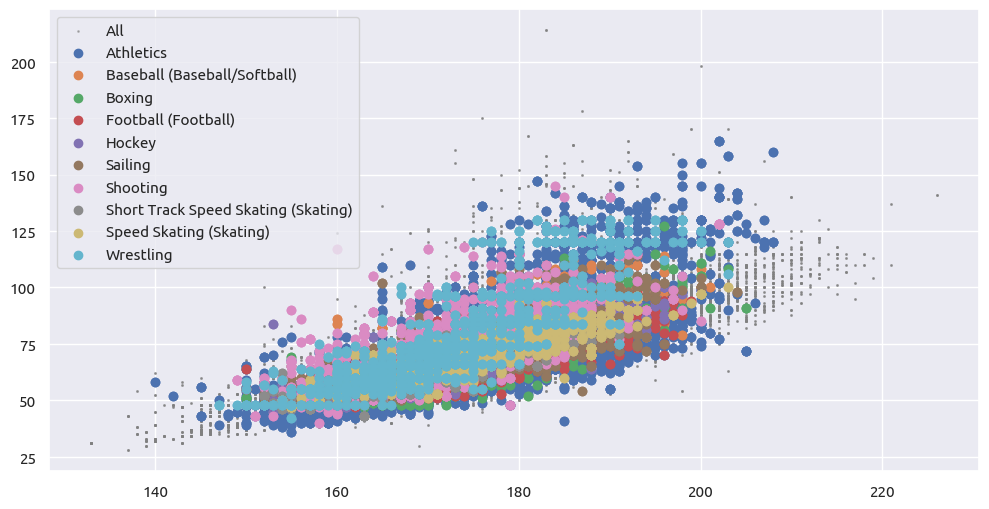

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x='height', y='weight', data=sub_athletes, label='All', c='grey', alpha=.5, s=1)
for name, sport in sub_athletes_group:
    if name in sub_sports:
        plt.scatter(x='height', y='weight', data=sport, label=name)
plt.legend()

In [16]:
sub_athletes = athletes[(athletes['year'] > 1800) & (athletes['sport'] == 'Athletics') & (athletes['gender'] == 'Male')]
sub_athletes_group = sub_athletes.groupby('event')

In [17]:
events = [ 'Athletics, 100 metres, Men(Olympic)',
 'Athletics, Marathon, Men(Olympic)']

Text(0.5, 0, 'Weight (kg)')

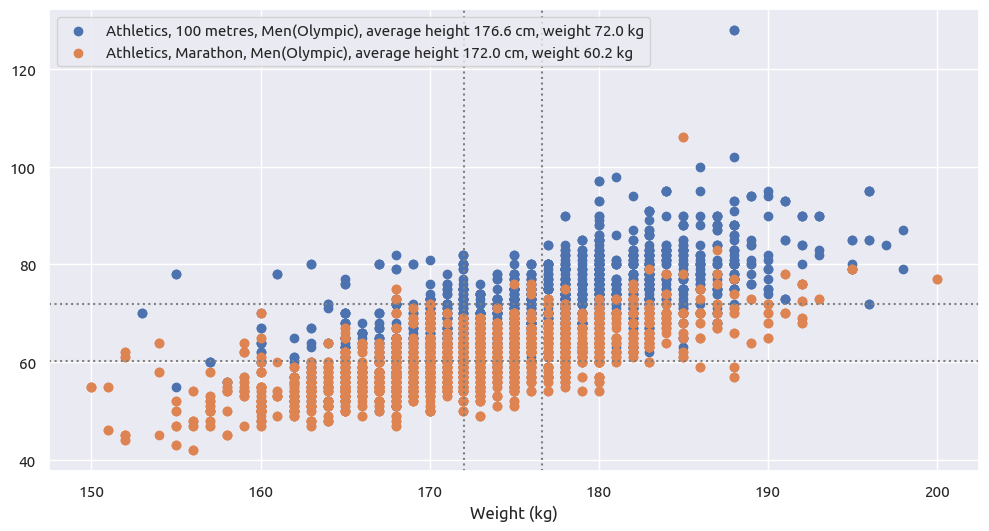

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(x='height', y='weight', data=athletes, label='All', c='grey', alpha=.5, s=.5)
for name, group in sub_athletes_group:
    if name in events:
        mean_height = group['height'].mean()
        mean_weight = group['weight'].mean()
        
        plt.axvline(x=mean_height, color='grey', linestyle=':')
        plt.axhline(y=mean_weight, color='grey', linestyle=':')
        
        plt.scatter(x='height', y='weight', data=group, 
                    label=f'{name}, average height {mean_height:.1f} cm, weight {mean_weight:.1f} kg')
                
plt.legend()
plt.xlabel('Height (cm)')
plt.xlabel('Weight (kg)')

In [19]:
sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['year'] > 2000) & (athletes['sport'] == 'Swimming (Aquatics)')]
sub_athletes_group = sub_athletes.groupby('medal')

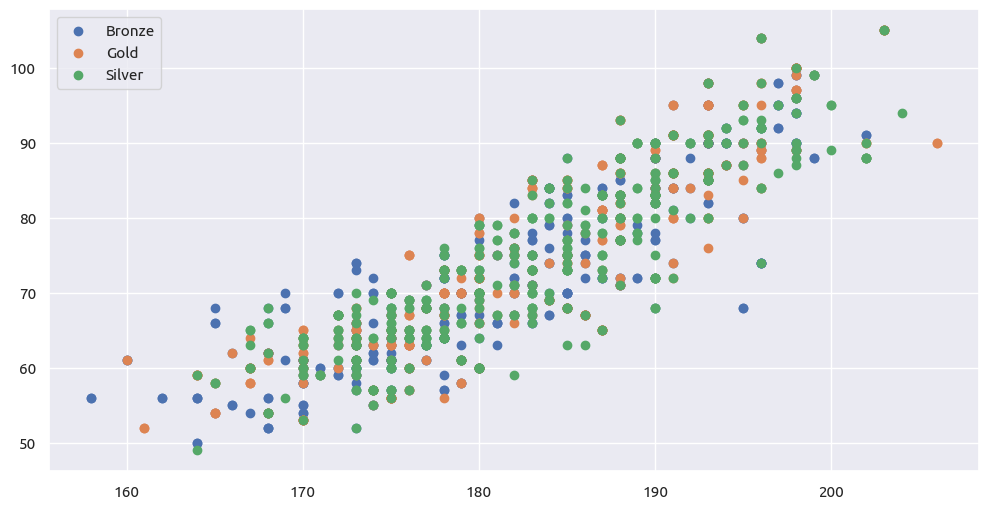

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(x='height', y='weight', data=athletes, label='All', c='grey', alpha=.5, s=.5)
for name, group in sub_athletes_group:
    plt.scatter(x='height', y='weight', data=group, label=name)
plt.legend()

## Sports

In [21]:
sub_athletes = athletes[athletes['season']=='Summer']
sport_year = sub_athletes.pivot_table(athletes, index=['year','sport'], aggfunc=lambda x: len(x.unique()))
sport_year = sport_year.reset_index()[['year','sport','event']] # keep only these columns
sport_year = to_object(sport_year) # remove category types on strings
sport_year = sport_year.pivot(index='sport', columns='year', values='event')
sport_year.fillna(0, inplace=True)
sport_year['total'] = sport_year[:].sum(axis=1)
sport_year = sport_year.sort_values(by=[2020, 2016, 'total'], ascending=False)
sport_year = sport_year.drop('total', axis=1)
sport_year = sport_year[sport_year[2020] != 0] # remove old sports

Text(141.40625, 0.5, 'Sport')

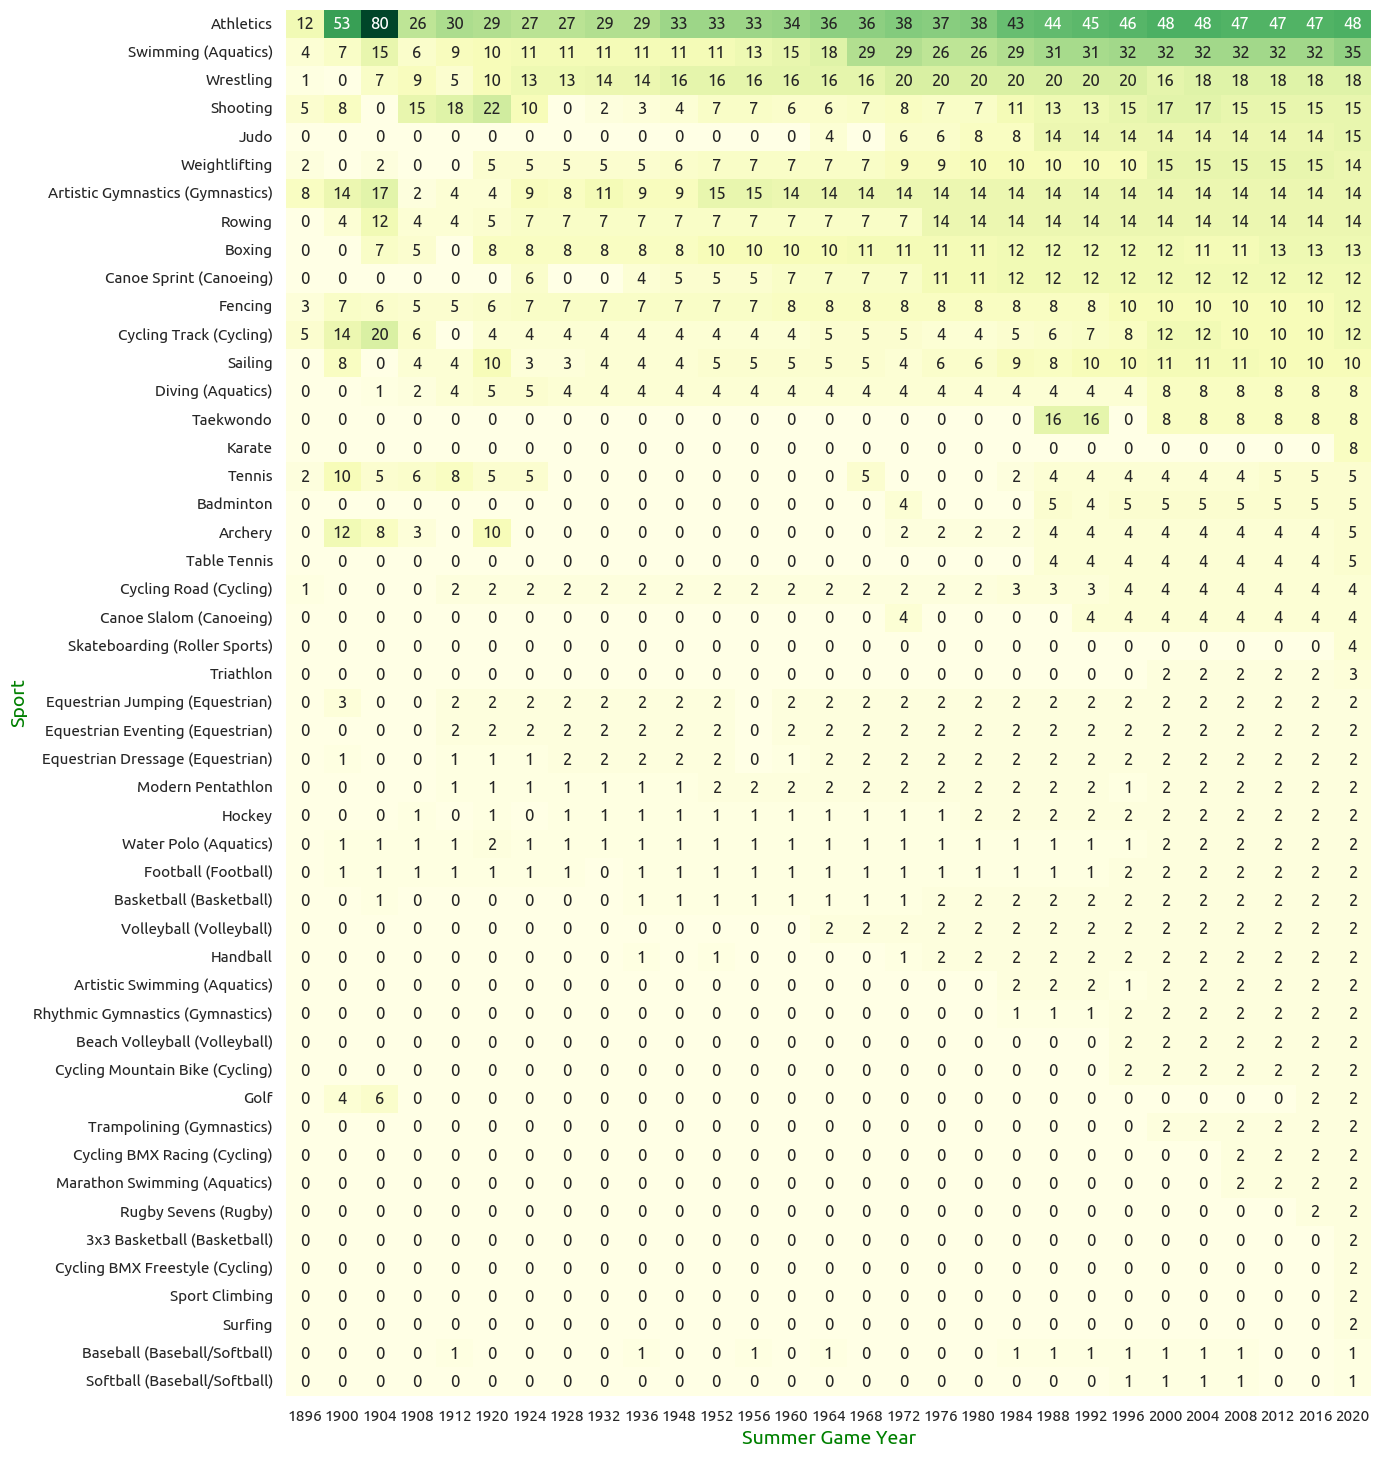

In [22]:
fig, ax = plt.subplots(figsize=(14, 18))
sns.heatmap(sport_year, annot=True, ax=ax, cmap="YlGn", cbar=False)
plt.title('Evolution of the number of events in each sport')
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")

In [23]:
sub_athletes = athletes[athletes['season']=='Winter']
sport_year = sub_athletes.pivot_table(athletes, index=['year','sport'], aggfunc=lambda x: len(x.unique()))
sport_year = sport_year.reset_index()[['year','sport','event']] # keep only these columns
sport_year = to_object(sport_year) # remove category types on strings
sport_year = sport_year.pivot(index='sport', columns='year', values='event')
sport_year.fillna(0, inplace=True)
sport_year['total'] = sport_year[:].sum(axis=1)
sport_year = sport_year.sort_values(by=[2022, 2018, 'total'], ascending=False)
sport_year = sport_year.drop('total', axis=1)
#sport_year = sport_year[sport_year[2022] != 0] # remove old sports

Text(141.40624999999997, 0.5, 'Sport')

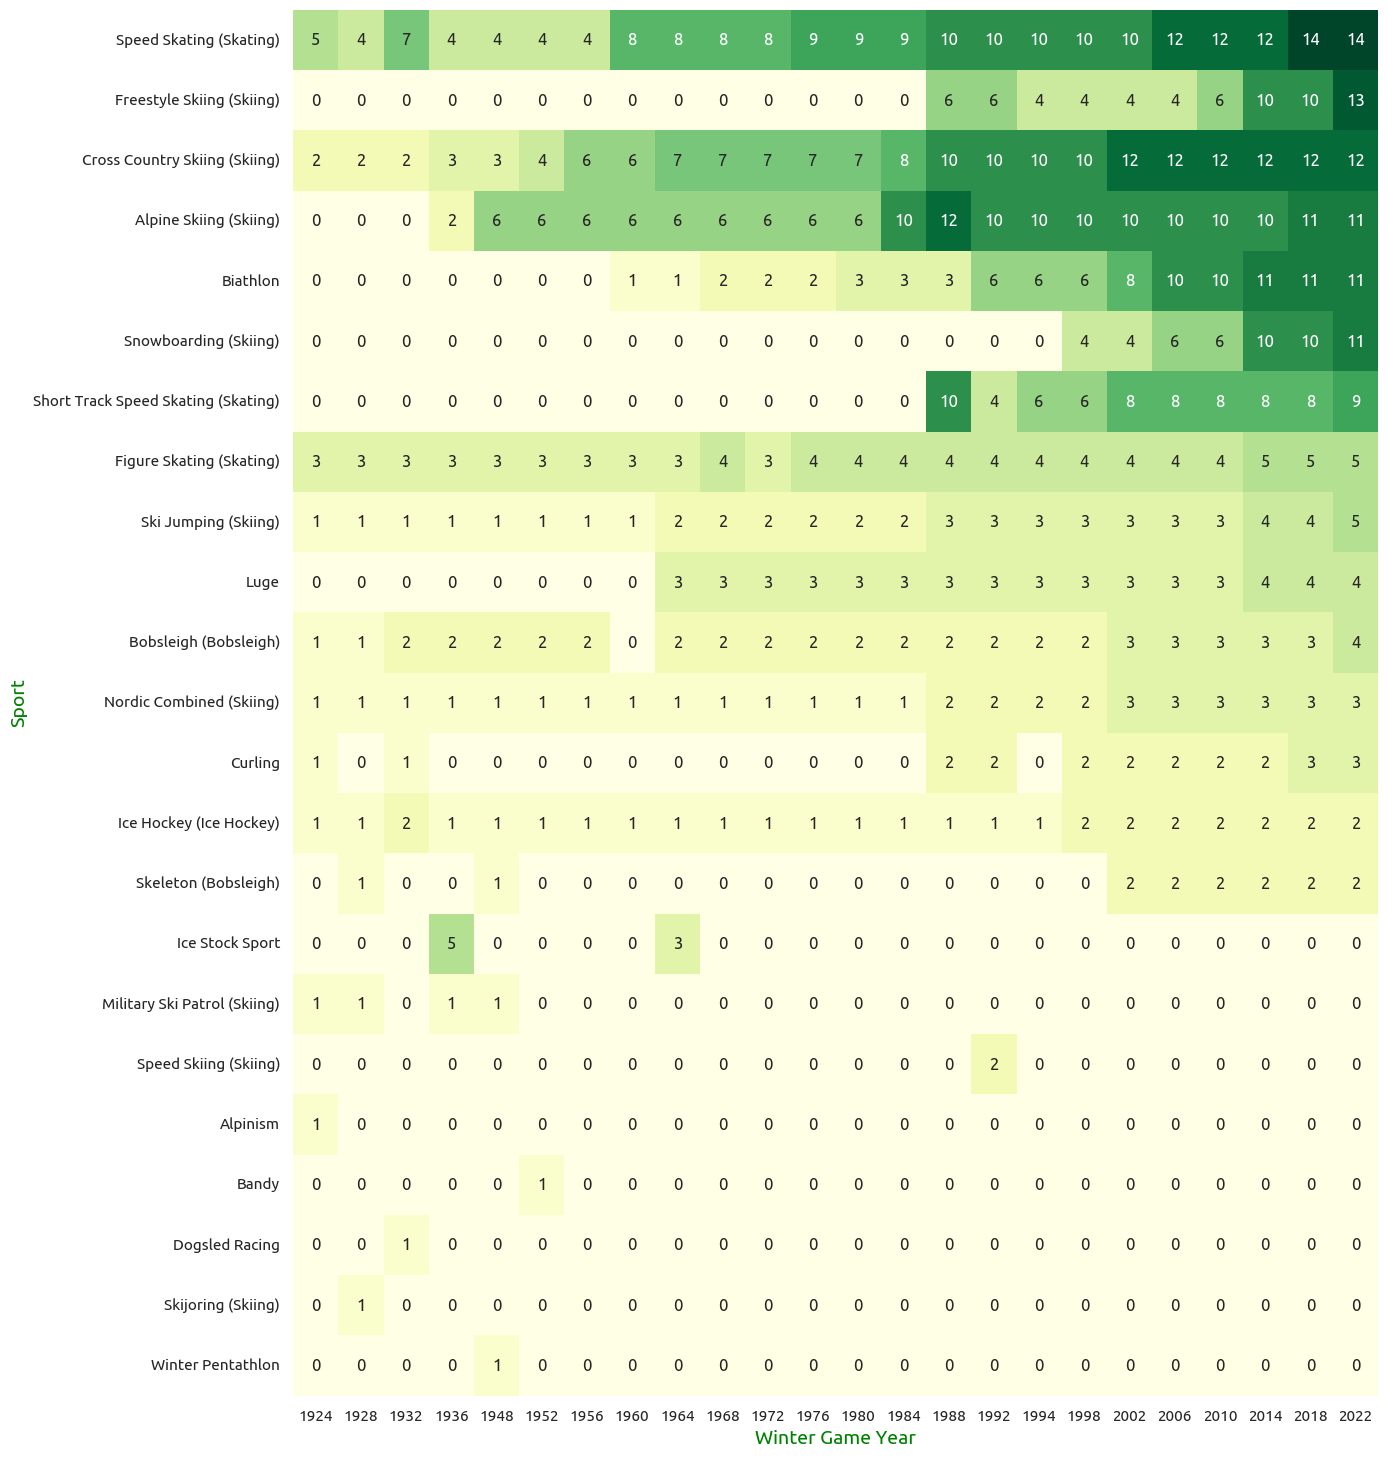

In [24]:
fig, ax = plt.subplots(figsize=(14, 18))
sns.heatmap(sport_year, annot=True, ax=ax, cmap="YlGn", cbar=False)
ax.set_xlabel('Winter Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")

In [25]:
sub_athletes = athletes[(athletes['season'] == 'Summer') & (athletes['competition'] == 'Olympics') & (athletes['year'] == 2020) & (athletes['medal']=="Gold")]
sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
sport_year = sub_athletes.pivot_table(athletes, index=['country', 'sport'], aggfunc=lambda x: np.sum(x.notnull()))
sport_year = sport_year.reset_index()[['country','sport','medal']] # keep only these columns
sport_year = to_object(sport_year) # remove category types on strings
sport_year = sport_year.pivot(index='sport', columns='country', values='medal')
sport_year.fillna(0, inplace=True)
sport_year = sport_year.astype('int')
sport_year['Total'] = sport_year[:].sum(axis=1)
sport_year.loc['Total'] = sport_year.sum()
sport_year = sport_year.sort_values(by=['Total'], ascending=False)
sport_year = sport_year.sort_values(by=['Total', 'Athletics'], ascending=False, axis=1)
sport_year = sport_year.drop(sport_year.columns[30:], axis=1)
n = 0
sport_year.loc['Other'] = sport_year[sport_year['Total'] <= n].sum()
sport_year = sport_year[sport_year['Total'] > n] # remove old sports
medals_year = sport_year.div(sport_year['Total'], axis='rows')
medals_year.fillna(0, inplace=True)
#sport_year = sport_year.drop('Total', axis=0) # Row
#medals_year = medals_year.drop('Total', axis=0) # Row

#sport_year = sport_year.drop('Total', axis=1) # Col
#medals_year = medals_year.drop('Total', axis=1) # Col

/tmp/ipykernel_3235/1088838146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates


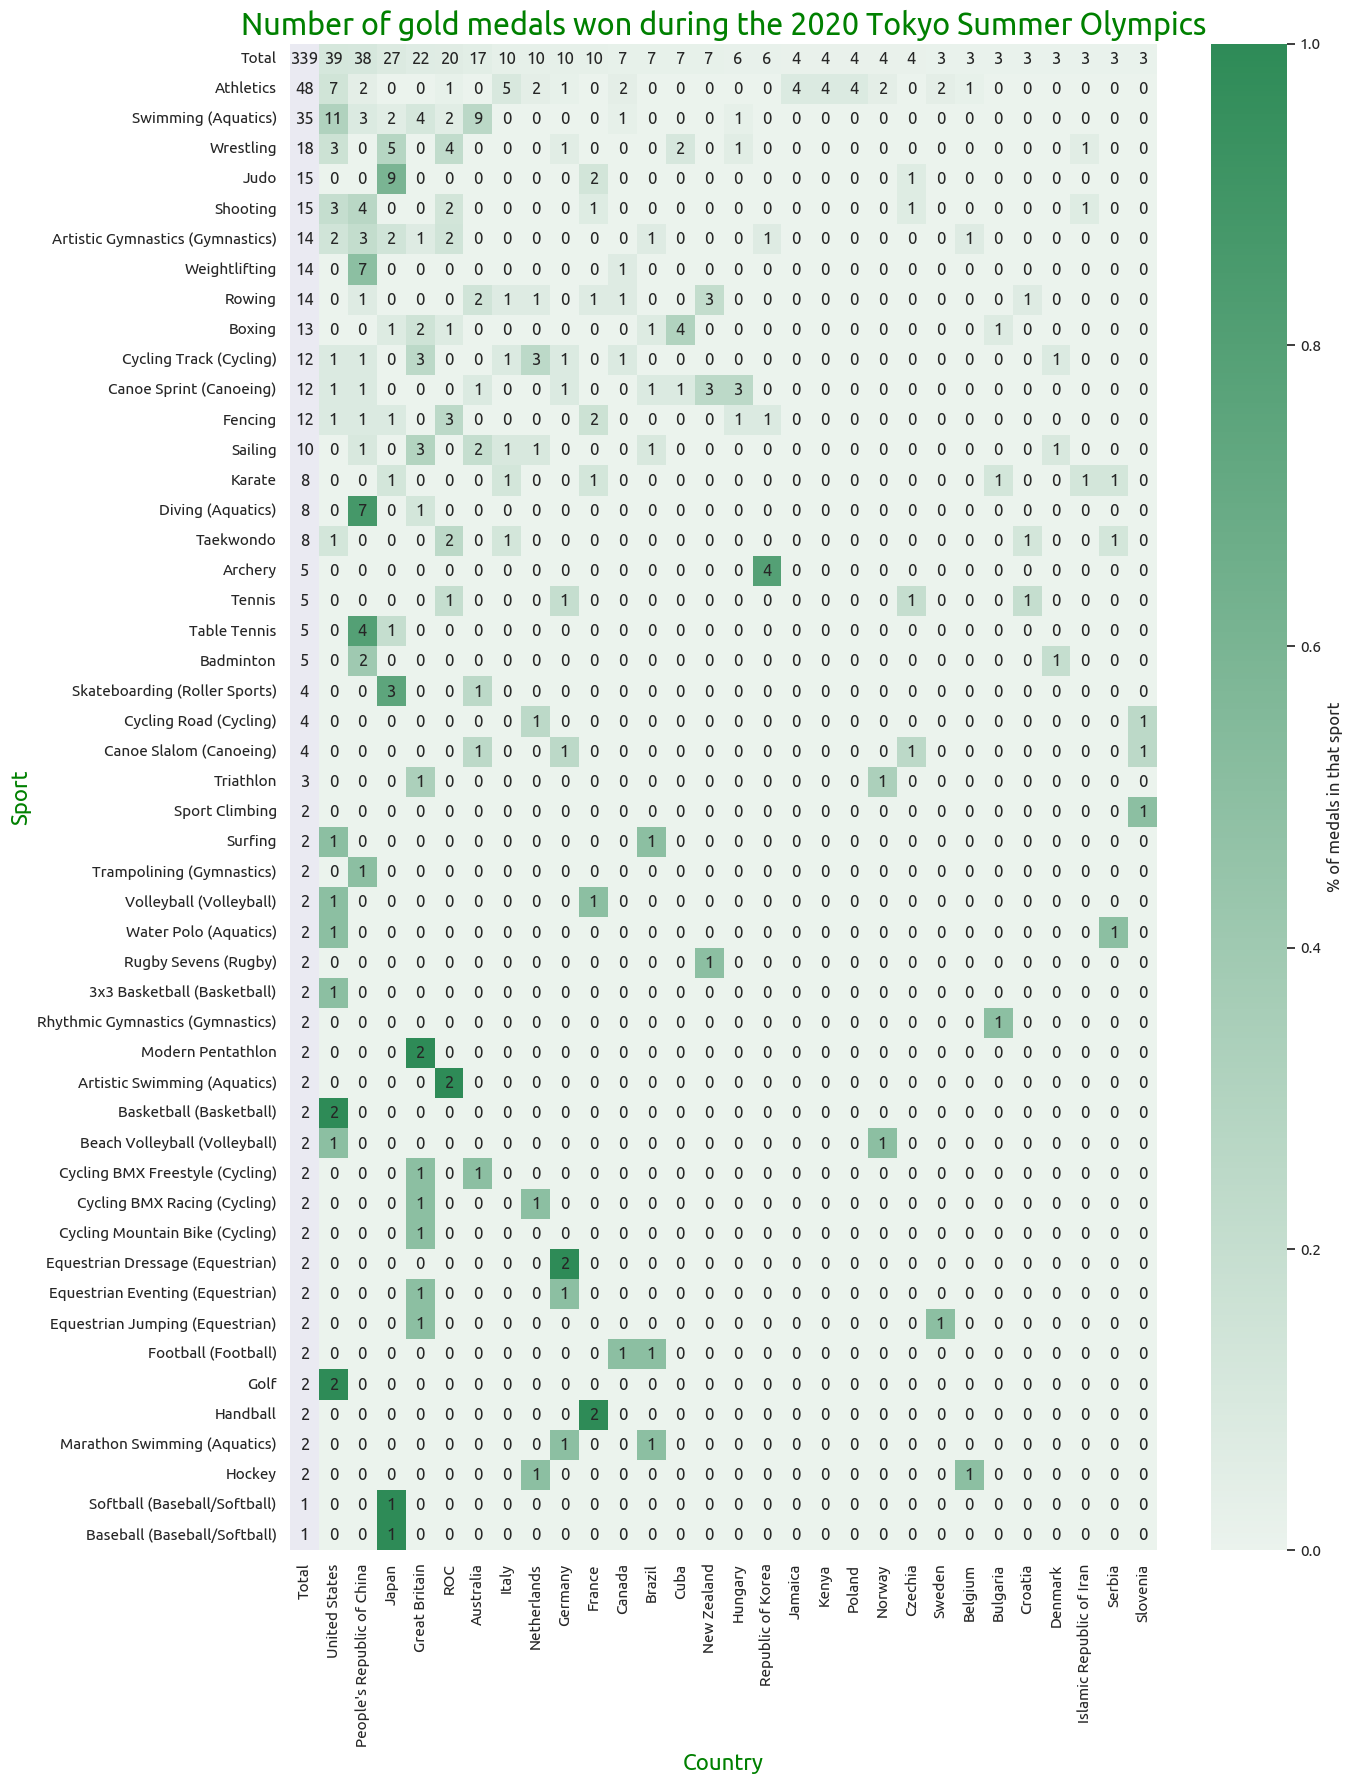

In [26]:
fig, ax = plt.subplots(figsize=(14, 18))
mask = np.zeros(sport_year.shape)
mask[:, 0] = True
sns.heatmap(medals_year, annot=False, ax=ax, mask=mask,
            cmap=sns.light_palette("seagreen", as_cmap=True), cbar=True, 
            cbar_kws={'label': '% of medals in that sport'})
sns.heatmap(sport_year, annot=True, ax=ax, cbar=False, cmap=ListedColormap(['white']), alpha=0, fmt="g")
plt.title('Number of gold medals won during the 2020 Tokyo Summer Olympics', size=22, color="green")
ax.grid(False)
ax.set_xlabel('Country', size=16, color="green")
ax.set_ylabel('Sport', size=16, color="green")
plt.tight_layout()

In [27]:
sport_year.style.background_gradient(subset=sport_year.columns)

country,Total,United States,People's Republic of China,Japan,Great Britain,ROC,Australia,Italy,Netherlands,Germany,France,Canada,Brazil,Cuba,New Zealand,Hungary,Republic of Korea,Jamaica,Kenya,Poland,Norway,Czechia,Sweden,Belgium,Bulgaria,Croatia,Denmark,Islamic Republic of Iran,Serbia,Slovenia
sport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total,339,39,38,27,22,20,17,10,10,10,10,7,7,7,7,6,6,4,4,4,4,4,3,3,3,3,3,3,3,3
Athletics,48,7,2,0,0,1,0,5,2,1,0,2,0,0,0,0,0,4,4,4,2,0,2,1,0,0,0,0,0,0
Swimming (Aquatics),35,11,3,2,4,2,9,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wrestling,18,3,0,5,0,4,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Judo,15,0,0,9,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Shooting,15,3,4,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
Artistic Gymnastics (Gymnastics),14,2,3,2,1,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
Weightlifting,14,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Rowing,14,0,1,0,0,0,2,1,1,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [28]:
sub_athletes.pivot_table(athletes, index=['country', 'sport'], aggfunc=lambda x: np.sum(x.notnull()))

born  competition  died  event  \
country       sport                                                             
Australia     Canoe Slalom (Canoeing)             1            1     0      1   
              Canoe Sprint (Canoeing)             1            1     0      1   
              Cycling BMX Freestyle (Cycling)     1            1     0      1   
              Rowing                              2            2     0      2   
              Sailing                             2            2     0      2   
...                                             ...          ...   ...    ...   
United States Wrestling                           3            3     0      3   
Uzbekistan    Boxing                              1            1     0      1   
              Taekwondo                           1            1     0      1   
              Weightlifting                       1            1     0      1   
Venezuela     Athletics                           1            1     0      1   

                                               game  gender  height  \
country       sport                                                   
Australia     Canoe Slalom (Canoeing)             1       1       1   
              Canoe Sprint (Canoeing)             1       1       1   
              Cycling BMX Freestyle (Cycling)     1       1       0   
              Rowing                              2       2       2   
              Sailing                             2       2       1   
...                                             ...     ...     ...   
United States Wrestling                           3       3       1   
Uzbekistan    Boxing                              1       1       1   
              Taekwondo                           1       1       1   
              Weightlifting                       1       1       0   
Venezuela     Athletics                           1       1       1   

                                               host_city  host_country  \
country       sport                                                      
Australia     Canoe Slalom (Canoeing)                  1             1   
              Canoe Sprint (Canoeing)                  1             1   
              Cycling BMX Freestyle (Cycling)          1             1   
              Rowing                                   2             2   
              Sailing                                  2             2   
...                                                  ...           ...   
United States Wrestling                                3             3   
Uzbekistan    Boxing                                   1             1   
              Taekwondo                                1             1   
              Weightlifting                            1             1   
Venezuela     Athletics                                1             1   

                                               host_noc  id  medal  name  noc  \
country       sport                                                             
Australia     Canoe Slalom (Canoeing)                 1   1      1     1    1   
              Canoe Sprint (Canoeing)                 1   1      1     1    1   
              Cycling BMX Freestyle (Cycling)         1   1      1     1    1   
              Rowing                                  2   2      2     2    2   
              Sailing                                 2   2      2     2    2   
...                                                 ...  ..    ...   ...  ...   
United States Wrestling                               3   3      3     3    3   
Uzbekistan    Boxing                                  1   1      1     1    1   
              Taekwondo                               1   1      1     1    1   
              Weightlifting                           1   1      1     1    1   
Venezuela     Athletics                               1   1      1     1    1   

                                               roles

In [29]:
for year in athletes['year'].unique():
    if year < 1980:
        continue
    sub_athletes = athletes[(athletes['season'] == 'Summer') & (athletes['competition'] == 'Olympics') & (athletes['year'] == year) & (athletes['medal']=="Gold")]
    sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
    if sub_athletes.empty:
        continue
    sport_year = sub_athletes.pivot_table(athletes, index=['country', 'sport'], aggfunc=lambda x: np.sum(x.notnull()))
    sport_year = sport_year.reset_index()[['country','sport','medal']] # keep only these columns
    sport_year = to_object(sport_year) # remove category types on strings
    sport_year = sport_year.pivot(index='sport', columns='country', values='medal')
    sport_year.fillna(0, inplace=True)
    sport_year = sport_year.astype('int')
    sport_year['Total'] = sport_year[:].sum(axis=1)
    sport_year.loc['Total'] = sport_year.sum()
    sport_year = sport_year.sort_values(by=['Total'], ascending=False)
    sport_year = sport_year.sort_values(by=['Total', 'Athletics'], ascending=False, axis=1)
    sport_year = sport_year.drop(sport_year.columns[30:], axis=1)
    n = 0
    sport_year.loc['Other'] = sport_year[sport_year['Total'] <= n].sum()
    sport_year = sport_year[sport_year['Total'] > n] # remove old sports
    medals_year = sport_year.div(sport_year['Total'], axis='rows')
    medals_year.fillna(0, inplace=True)
    #sport_year = sport_year.drop('Total', axis=0) # Row
    #medals_year = medals_year.drop('Total', axis=0) # Row

    sport_year = sport_year.drop('Total', axis=1) # Col
    medals_year = medals_year.drop('Total', axis=1) # Col
    
    fig, ax = plt.subplots(figsize=(14, 18))
    sns.heatmap(medals_year, annot=False, ax=ax, cmap=sns.light_palette("seagreen", as_cmap=True), cbar=True, 
                cbar_kws={'label': '% of medals in that sport'})
    sns.heatmap(sport_year, annot=True, ax=ax, cbar=False, cmap=ListedColormap(['white']), alpha=0)
    plt.title(f'Number of gold medals won during the {year} Summer Olympics', size=22, color="green")
    ax.set_xlabel('Country', size=16, color="green")
    ax.set_ylabel('Sport', size=16, color="green")
    plt.tight_layout()
    plt.savefig(f'graphs/medals-game-country-{year}.png')
    plt.clf()

/tmp/ipykernel_3235/1310999404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
/tmp/ipykernel_3235/1310999404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_athletes.drop_duplicates(subset=['event', 'medal'], inplace=True) # Remove team duplicates
/tmp/ipykernel_3235/1310999404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>

<Figure size 1400x1800 with 0 Axes>